<a href="https://colab.research.google.com/github/Jhessye/introducao_recomendacao/blob/main/introdu%C3%A7%C3%A3o_a_recomenda%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
filmes = pd.read_csv("/content/movies - movies.csv")
filmes.rename(columns={"movieId":"filmeId", "title":"titulo", "genres":"generos"}, inplace=True)
filmes = filmes.set_index("filmeId")
filmes.head(5)

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas = pd.read_csv("/content/ratings - ratings.csv")
notas.rename(columns={"userId":"usuarioId", "movieId":"filmeId", "rating":"nota", "timestamp":"momento"}, inplace=True)
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
#entender melhor esse conjunto de dados

notas.describe() #ou notas.info()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# Primeira ideia de recomendação: heurística de total de votos
Só com pandas

In [ ]:
# quantas vezes um filme foi visto (colocado uma nota nele na plataforma)?

total_de_votos = notas["filmeId"].value_counts() #conta quantas vezes uma nota foi dada a um filme
total_de_votos.head()
#o filme 356 foi o mais visto

,count
filmeId,
356,329
318,317
296,307
593,279
2571,278


In [ ]:
filmes.loc[356] #busca pelo índice, se não tivesse o índice podderia ser aplicado a busca com filtro filmes[filmes["filmeId"] == 356]

,356
titulo,Forrest Gump (1994)
generos,Comedy|Drama|Romance|War


In [ ]:
#adicionar coluna total de votos na tabela filmes, bater o índice e descobrir os filmes mais votados

filmes["total_de_votos"] = total_de_votos #coloque em filmes a coluna total_de_votos da tabela total_de_votos
filmes.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [ ]:
#ordenação
filmes.sort_values("total_de_votos", ascending=False).head(10) #lista de maiores filmes votados

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


In [ ]:
#nota média dos filmes

notas_medias = notas.groupby("filmeId")["nota"].mean() #faz uma média apenas na coluna notas
notas_medias.head()

#filmeId agora é um índice na tabela notas_medias (groupby)

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [ ]:
#ordenar por nota

notas_medias.sort_values(ascending=False).head()

,nota
filmeId,
187717,5.0
6983,5.0
5328,5.0
95843,5.0
3941,5.0


In [ ]:
filmes.loc[88448]

,88448
titulo,Paper Birds (Pájaros de papel) (2010)
generos,Comedy|Drama
total_de_votos,1.0


In [ ]:
#juntar a coluna na tabela amostrar quais os filmes mais bem votads
filmes["notas_medias"] = notas_medias #junta índice com índice (como os dois tem o mesmo índice filmeId então está tudo certinho)

In [ ]:
filmes.sort_values("total_de_votos", ascending=False).head(10) #os filmes mais vistos estão bem votados?
#nem todo filme mais visto tem uma nota muito boa

,titulo,generos,total_de_votos,notas_medias
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


#nova heurística: nota média e filtrando votos


In [ ]:
#ordenar pela nota mais alta
filmes.sort_values("notas_medias", ascending=False).head(10) #ordenando em ordem decrescente para ver os filmes com maior pontuação média
#filmes que ngm conhece, apenas 1 voto com 5 estrelas. Isso não iz que o filme é bom, se apenas 1 pessoa votou.

,titulo,generos,total_de_votos,notas_medias
filmeId,,,,
187717,Won't You Be My Neighbor? (2018),Documentary,1.0,5.0
6983,Jane Eyre (1944),Drama|Romance,1.0,5.0
5328,Rain (2001),Drama|Romance,1.0,5.0
95843,Goodbye Charlie (1964),Comedy|Fantasy|Romance,1.0,5.0
3941,Sorority House Massacre (1986),Horror,1.0,5.0
3940,Slumber Party Massacre III (1990),Horror,1.0,5.0
3939,Slumber Party Massacre II (1987),Horror,1.0,5.0
7815,True Stories (1986),Comedy|Musical,1.0,5.0
162414,Moonlight,Drama,1.0,5.0


In [ ]:
#filmes com maiores votos pra mais de 50

filmes_com_mais_de_50_votos = filmes.query("total_de_votos >= 50").sort_values("notas_medias", ascending=False)
filmes_com_mais_de_50_votos.head(10)

,titulo,generos,total_de_votos,notas_medias
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [ ]:
#filmes que assisti
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti] #filtra pelo índice
#cada filme tem 3 características

,titulo,generos,total_de_votos,notas_medias
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [ ]:
#procurar filmes de Adventure|Children|Fantasy

filmes.query("generos == 'Adventure|Children|Fantasy'").sort_values("notas_medias", ascending=False).head(10)

,titulo,generos,total_de_votos,notas_medias
filmeId,,,,
56915,"Water Horse: Legend of the Deep, The (2007)",Adventure|Children|Fantasy,1.0,4.000000
126142,The Cave of the Golden Rose (1991),Adventure|Children|Fantasy,1.0,4.000000
80748,Alice in Wonderland (1933),Adventure|Children|Fantasy,1.0,4.000000
82169,Chronicles of Narnia: The Voyage of the Dawn T...,Adventure|Children|Fantasy,7.0,3.857143
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
2161,"NeverEnding Story, The (1984)",Adventure|Children|Fantasy,43.0,3.581395
59501,"Chronicles of Narnia: Prince Caspian, The (2008)",Adventure|Children|Fantasy,12.0,3.541667
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [ ]:
#reduzir a base de dados a apenas do interesse meu Adventure|Children|Fantasy
#similaridades: exatamene os mesmos gêneros

aventura_infantil_fantasia = filmes_com_mais_de_50_votos.query("generos == 'Adventure|Children|Fantasy'") #filtrar filmes de nicho
aventura_infantil_fantasia.drop(eu_assisti, errors='ignore').sort_values("notas_medias", ascending=False) #drop os filmes que ja assistiu pra não repetir e ordena por notas maiores

,titulo,generos,total_de_votos,notas_medias
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


#  procurar usuários "similares"

- joão deu nota 4 no filme tooy story
- maria deu nota 5 no filme toy story
- paulo deu nota 3 no filme toy story
- joana deu nota 3.5 no filme toy story

São "similares" aqueles que tem o numero de nota mais perto. (maria similar a joão, 5-4 = 1, entõa a distância de joão para maria é de 1 [usar o o valor absoluto])

x-y ==> distância

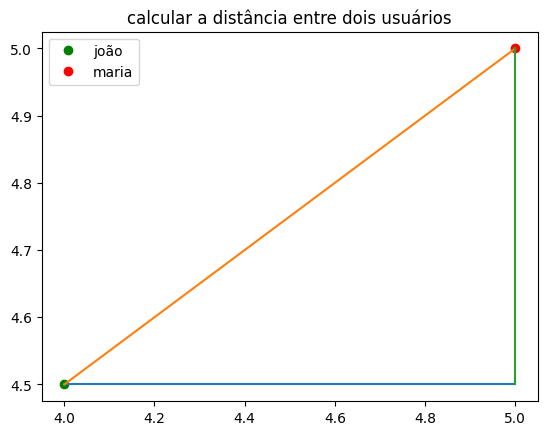

In [ ]:
#joão = [4, 4.5]
# maria = [5, 5]

import matplotlib.pyplot as plt
plt.plot(4, 4.5, 'go') # g = green o = ponto
plt.plot(5,5, 'ro') # r = red o = ponto
plt.legend(["joão", "maria"])
plt.title("calcular a distância entre dois usuários")

#triangulo retangulo
plt.plot([4 ,5], [4.5, 4.5], linestyle='-') #cateto
plt.plot([4 ,5], [4.5, 5], linestyle='-') #hipotenusa
plt.plot([5, 5], [4.5, 5], linestyle='-') #oposto

#coenhecemos o valor dos catetos, a diferença entre 5 e 4 é = 1 e entre 5 e 4.5 é 0.5

In [ ]:
#calculando a hipotenusa

import numpy as np

joao = np.array([4, 4.5])
maria = np.array([5, 5])

np.absolute(joao - maria) #subtrai os dois vetores e retorna em módulo

array([1. , 0.5])

In [ ]:
from math import sqrt

def pitagoras(a,b):
  return sqrt(a**2+b**2)

In [ ]:
pitagoras(1, 0.5)

1.118033988749895

#Distância entre usuários do dataset

In [ ]:
np.linalg.norm(joao - maria) #distância entre os dois vetores

np.float64(1.118033988749895)

In [ ]:
def distancia_de_vetores(a,b): #dois vetores
  return np.linalg.norm(a-b)

distancia_de_vetores(joao, maria)

np.float64(1.118033988749895)

In [ ]:
notas_do_usuario = notas.query("usuarioId == 1")
notas_do_usuario = notas_do_usuario[["filmeId", "nota"]].set_index("filmeId")
#filtrano os filmes e a notas o usuário 1

In [ ]:
def notas_do_usuario(usuario):
  notas_do_usuario = notas.query("usuarioId == %d" % usuario)
  notas_do_usuario = notas_do_usuario[["filmeId", "nota"]].set_index("filmeId")
  return notas_do_usuario

In [ ]:
notas_do_usuario(4) #pode pesqusar a nota de qualquer usuário

,nota
filmeId,
21,3.0
32,2.0
45,3.0
47,2.0
52,3.0
...,...
4765,5.0
4881,3.0
4896,4.0


In [ ]:
usuario_1 = notas_do_usuario(1)
usuario_4 = notas_do_usuario(4)

In [ ]:
#distancia do usuário 1 para o usuário 4
diferencas = usuario_1.join(usuario_4, lsuffix="_esquerda", rsuffix="_direita").dropna() #podia usar merge
distancia_de_vetores(diferencas["nota_esquerda"] , diferencas["nota_direita"])

np.float64(11.135528725660043)

In [ ]:
diferencas

,nota_esquerda,nota_direita
filmeId,,
47,5.0,2.0
235,4.0,2.0
260,5.0,5.0
296,3.0,1.0
441,4.0,1.0
457,5.0,5.0
553,5.0,2.0
593,4.0,5.0
608,5.0,5.0


In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_usuario_1", rsuffix="_usuario_2").dropna()
  distancia = distancia_de_vetores(diferencas["nota_usuario_1"] , diferencas["nota_usuario_2"])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
distancia_de_usuarios(1,4)

[1, 4, np.float64(11.135528725660043)]

In [ ]:
len(notas['usuarioId'].unique()) #np.shape ou len

610

In [ ]:
total_usuarios = notas['usuarioId'].unique() #650 usuarios

In [ ]:
distancia = []
def distancia_de_todos(id):
  for usuario in total_usuarios:
    informacoes = distancia_de_usuarios(1, usuario)
    distancia.append(informacoes)
  return distancia

In [ ]:
distancia[:5]

[]

In [ ]:
distancia_de_todos(1)[:5]

[[1, np.int64(1), np.float64(0.0)],
 [1, np.int64(2), np.float64(1.4142135623730951)],
 [1, np.int64(3), np.float64(8.200609733428363)],
 [1, np.int64(4), np.float64(11.135528725660043)],
 [1, np.int64(5), np.float64(3.7416573867739413)]]

In [ ]:
def distancia_de_todos(id):
  distancias = [distancia_de_usuarios(id, usuario) for usuario in total_usuarios] #pra cada usuário desse total de usuários cria uma lista chamando a funcão distancia de usuarios
  distancias = pd.DataFrame(distancias, columns= ["voce", "outra_pessoa", "distancia"])
  return distancias

In [ ]:
distancia_de_todos(1).head(20)

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657
5,1,6,8.602325
6,1,7,7.106335
7,1,8,3.741657
8,1,9,1.000000
9,1,10,7.858117


#usuários sem filmes em comum são colocados bem distante um do outro

quem não tem nada em comum com o outro, vamos distanciar deles mesmos

In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_usuario_1", rsuffix="_usuario_2").dropna()

  if (len(diferencas) < minimo):
    return [usuario_id1, usuario_id2, 100000] #retorna uma distancia enorme para quem não tem a quantidade mínima de filmes para comparar

  distancia = distancia_de_vetores(diferencas["nota_usuario_1"] , diferencas["nota_usuario_2"])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
distancia_de_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [ ]:
distancia_de_todos(1).sort_values("distancia", ascending=True).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
76,1,77,0.000000
510,1,511,0.500000
365,1,366,0.707107
48,1,49,1.000000


In [ ]:
notas_do_usuario(1).join(notas_do_usuario(77), lsuffix="_esquerda", rsuffix="_direita").dropna()

,nota_esquerda,nota_direita
filmeId,,
260,5.0,5.0
1196,5.0,5.0
1198,5.0,5.0
1210,5.0,5.0
2571,5.0,5.0
3578,5.0,5.0


In [ ]:
def mais_proximos_de(voce_id):
  distancias = distancia_de_todos(voce_id)

  distancias = distancias[distancias["outra_pessoa"] != voce_id] #excluindo quem é ele mesmo

  return distancias.sort_values("distancia")

In [ ]:
mais_proximos_de(1).head()

,voce,outra_pessoa,distancia
76,1,77,0.000000
510,1,511,0.500000
365,1,366,0.707107
522,1,523,1.000000
8,1,9,1.000000


#parâmetros para teste

se pedir para análisar os mais próximos, vão análisar os n primeiros elementos. Se não passar o N ele analisa todo mundo.

In [ ]:
def mais_proximos_de(voce_id, numeros_de_usuarios_a_analisar = None): #não vai calcular com todo mundo, vai calcular com uma quantidade específica de pessoas "None"
  distancias = distancia_de_todos(voce_id, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  distancias = distancias.set_index("outra_pessoa")
  distancias = distancias.drop(voce_id, errors='ignore') #excluindo quem é ele mesm
  return distancias.sort_values("distancia")

In [ ]:
def distancia_de_todos(id, numeros_de_usuarios_a_analisar = None):
  total_usuarios = notas['usuarioId'].unique()
  if numeros_de_usuarios_a_analisar:
    total_usuarios = total_usuarios[:numeros_de_usuarios_a_analisar]
  distancias = [distancia_de_usuarios(id, usuario) for usuario in total_usuarios] #pra cada usuário desse total de usuários cria uma lista chamando a funcão distancia de usuarios
  distancias = pd.DataFrame(distancias, columns= ["voce", "outra_pessoa", "distancia"])
  return distancias

In [ ]:
mais_proximos_de(1, numeros_de_usuarios_a_analisar = 5)

,voce,distancia
outra_pessoa,,
5,1,3.741657
3,1,8.200610
4,1,11.135529
2,1,100000.000000


In [ ]:
def distancia_de_usuarios(usuario_id1, usuario_id2, minimo = 5):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_usuario_1", rsuffix="_usuario_2").dropna()

  if (len(diferencas) < minimo):
    return None #retorna nada, não tem nada parecido
  distancia = distancia_de_vetores(diferencas["nota_usuario_1"] , diferencas["nota_usuario_2"])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
def distancia_de_todos(id, numeros_de_usuarios_a_analisar = None):
  total_usuarios = notas['usuarioId'].unique()
  if numeros_de_usuarios_a_analisar:
    total_usuarios = total_usuarios[:numeros_de_usuarios_a_analisar]
  distancias = [distancia_de_usuarios(id, usuario) for usuario in total_usuarios] #pra cada usuário desse total de usuários cria uma lista chamando a funcão distancia de usuarios
  distancias = list(filter(None, distancias)) #tira os Nones de distancias e faz uma lista com oq sobra
  distancias = pd.DataFrame(distancias, columns= ["voce", "outra_pessoa", "distancia"])
  return distancias

In [ ]:
mais_proximos_de(1, numeros_de_usuarios_a_analisar = 10)

,voce,distancia
outra_pessoa,,
9,1,1.000000
5,1,3.741657
8,1,3.741657
7,1,7.106335
10,1,7.858117
3,1,8.200610
6,1,8.602325
4,1,11.135529


In [ ]:
def sugere_para(voce, numeros_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)

  filmes_que_voce_ja_viu = notas_de_voce.index #colunas filmeId
  similares = mais_proximos_de(voce, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  similar = similares.iloc[0].name #usuário mais similar (o primeiro usuário da lista ordenada pela amostragem)

  notas_do_similar = notas_do_usuario(similar) #recebe as notas do usuário mais próximo
  notas_do_similar = notas_do_similar.drop(filmes_que_voce_ja_viu, errors='ignore') #quero saber os filmes q n vi e se tiver algum filme q eu vi e ele não, ignora
  recomendacoes = notas_do_similar.sort_values('nota', ascending=False) #vamos ver quais filmes eu não vi, mas uma pessoa similar a mim viu e gostou

  return recomendacoes.join(filmes['titulo'])

In [ ]:
sugere_para(1, numeros_de_usuarios_a_analisar = 10)

,nota,titulo
filmeId,,
2300,5.0,"Producers, The (1968)"
5481,5.0,Austin Powers in Goldmember (2002)
5902,5.0,Adaptation (2002)
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,..."
5952,5.0,"Lord of the Rings: The Two Towers, The (2002)"
1674,4.0,Witness (1985)
1095,4.0,Glengarry Glen Ross (1992)
5445,4.0,Minority Report (2002)
922,4.0,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)


In [ ]:
sugere_para(1).head() #usa todos os usuários

,nota,titulo
filmeId,,
3996,5.0,"Crouching Tiger, Hidden Dragon (Wo hu cang lon..."
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,..."
5349,5.0,Spider-Man (2002)
7153,5.0,"Lord of the Rings: The Return of the King, The..."
5952,5.0,"Lord of the Rings: The Two Towers, The (2002)"


#Sugerindo baseado em vários usuários

In [ ]:
def mais_proximos_de(voce_id, n_mais_proximos = 10, numeros_de_usuarios_a_analisar = None): #por padrão os 10 amsi proximos
  distancias = distancia_de_todos(voce_id, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa")
  distancias = distancias.drop(voce_id, errors='ignore') #excluindo quem é ele mesm
  return distancias.head(n_mais_proximos)

In [ ]:
mais_proximos_de(1, n_mais_proximos= 2, numeros_de_usuarios_a_analisar = 100)

,voce,distancia
outra_pessoa,,
77,1,0.0
49,1,1.0


In [ ]:
def sugere_para(voce, n_mais_proximos = 10, numeros_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = mais_proximos_de(voce, n_mais_proximos = n_mais_proximos, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  usuarios_similares = similares.index #vai pegar o ID dos usuarios proximos

  #pegar a nota desses usuários
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares] #transformando em índice pra usar loc[]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[['nota']]

  recomendacoes.sort_values('nota', ascending=False) #recomendacoes ordenadas
  return recomendacoes.join(filmes['titulo'])

  #nota é a nota da recomendacao e nota_media é a nota média daquele filme no sistema

In [ ]:
sugere_para(1).head()

,nota,titulo
filmeId,,
2,4.500000,Jumanji (1995)
32,5.000000,Twelve Monkeys (a.k.a. 12 Monkeys) (1995)
41,3.000000,Richard III (1995)
110,4.166667,Braveheart (1995)
187,3.000000,Party Girl (1995)


reefinindo o mais_proximos_de e sugere_para

In [ ]:
def knn(voce_id, k_mais_proximos = 10, numeros_de_usuarios_a_analisar = None): #por padrão os 10 amsi proximos
  distancias = distancia_de_todos(voce_id, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  distancias = distancias.sort_values("distancia")
  distancias = distancias.set_index("outra_pessoa")
  distancias = distancias.drop(voce_id, errors='ignore') #excluindo quem é ele mesm
  return distancias.head(k_mais_proximos)

In [ ]:
def sugere_para(voce, k_mais_proximos = 10, numeros_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  usuarios_similares = similares.index #vai pegar o ID dos usuarios proximos

  #pegar a nota desses usuários
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares] #transformando em índice pra usar loc[]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[['nota']]

  recomendacoes.sort_values('nota', ascending=False) #recomendacoes ordenadas
  return recomendacoes.join(filmes['titulo'])

  #nota é a nota da recomendacao e nota_media é a nota média daquele filme no sistema

#Testar um usuário novo

In [ ]:
filmes.sample(10)

,titulo,generos,total_de_votos,notas_medias
filmeId,,,,
4068,Sugar & Spice (2001),Comedy,7.0,2.714286
581,"Celluloid Closet, The (1995)",Documentary,4.0,4.000000
33126,"Frisco Kid, The (1979)",Comedy|Western,1.0,2.500000
2534,Avalanche (1978),Action,3.0,2.500000
8807,Harold and Kumar Go to White Castle (2004),Adventure|Comedy,34.0,3.455882
3831,Saving Grace (2000),Comedy,11.0,3.909091
132424,The Longest Ride (2015),Drama|Romance,2.0,1.750000
4449,Adanggaman (2000),Drama,1.0,2.000000
47202,"Secret Life of Words, The (2005)",Drama|Romance,1.0,4.000000


In [ ]:
filmes.loc[[122904, 1246, 2529, 2329, 2324, 1, 7, 2, 1196, 260]]["titulo"] #filmes aleatorios

,titulo
filmeId,
122904,Deadpool (2016)
1246,Dead Poets Society (1989)
2529,Planet of the Apes (1968)
2329,American History X (1998)
2324,Life Is Beautiful (La Vita è bella) (1997)
1,Toy Story (1995)
7,Sabrina (1995)
2,Jumanji (1995)
1196,Star Wars: Episode V - The Empire Strikes Back...


dados = [[filme, nota], [filme, nota], ...]

In [ ]:
def novo_usuario(dados):
  novo_usuario = notas['usuarioId'].max() + 1 #adicionar mais um usuário
  notas_do_usuario_novo = pd.DataFrame(dados, columns=["filmeId","nota"]) #criar dataFrame com os dados
  notas_do_usuario_novo["usuarioId"] = novo_usuario #colocar a coluna usuário no df
  return pd.concat([notas, notas_do_usuario_novo]) #junta esse novo usuário na planilha notas

In [ ]:
notas['usuarioId'].max()

610

In [ ]:
notas = novo_usuario([[122904, 2],  [1246, 5],  [2529, 2],  [2329, 5],  [2324, 5],  [1, 2],  [7, 0.5],  [2, 2],  [1196, 1],  [260, 1]])

In [ ]:
sugere_para(611).head() #ainda puxando filmes de nicho

,nota,titulo
filmeId,,
1,3.250000,Toy Story (1995)
2,3.000000,Jumanji (1995)
3,3.500000,Grumpier Old Men (1995)
5,2.000000,Father of the Bride Part II (1995)
6,4.166667,Heat (1995)


# Utilizar somente as notas de filmes com mais de 50 votos

In [ ]:
notas = notas.set_index("filmeId").loc[filmes_com_mais_de_50_votos.index] #coloca como indice os filmes, e localiza apenas os que tem mais de 50 votos

In [ ]:
notas.head() #não tem a coluna filmeID, é o index

,usuarioId,nota,momento
filmeId,,,
318,2,3.0,1.445715e+09
318,5,3.0,8.474349e+08
318,6,5.0,8.455532e+08
318,8,5.0,8.394635e+08
318,11,4.0,9.021551e+08


In [ ]:
notas = notas.reset_index() #agora temos a coluna filmeID, fizemos isso para conseguir acessar nas funções q chamam essa coluna
notas.head()

,filmeId,usuarioId,nota,momento
0,318,2,3.0,1.445715e+09
1,318,5,3.0,8.474349e+08
2,318,6,5.0,8.455532e+08
3,318,8,5.0,8.394635e+08
4,318,11,4.0,9.021551e+08


In [ ]:
sugere_para(611).head() #sugerindo sem ser filmes que são de nicho

,nota,titulo
filmeId,,
1,3.250000,Toy Story (1995)
2,3.000000,Jumanji (1995)
3,3.500000,Grumpier Old Men (1995)
6,4.166667,Heat (1995)
7,2.500000,Sabrina (1995)


criar o mínimo de fimes em comum entre as pessoas mais próximas

In [ ]:
from logging import error
def sugere_para(voce, k_mais_proximos = 10, numeros_de_usuarios_a_analisar = None):
  notas_de_voce = notas_do_usuario(voce)
  filmes_que_voce_ja_viu = notas_de_voce.index

  similares = knn(voce, k_mais_proximos = k_mais_proximos, numeros_de_usuarios_a_analisar = numeros_de_usuarios_a_analisar)
  usuarios_similares = similares.index #vai pegar o ID dos usuarios proximos

  #pegar a nota desses usuários
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares] #transformando em índice pra usar loc[]
  recomendacoes = notas_dos_similares.groupby("filmeId").mean()[['nota']] # [[]] df
  aparicoes = notas_dos_similares.groupby("filmeId").count()[['nota']] #quantas vezes um filme apareceu pelas pessoas proximas
  filtro_minimo = k_mais_proximos/2
  recomendacoes = recomendacoes.join(aparicoes, lsuffix="_media_dos_usuarios", rsuffix="_apaicoes_nos_usuarios") #junta
  recomendacoes = recomendacoes[recomendacoes["nota_apaicoes_nos_usuarios"] >= filtro_minimo] #filtra

  recomendacoes = recomendacoes.sort_values("nota_media_dos_usuarios", ascending=False)

  recomendacoes = recomendacoes.drop(filmes_que_voce_ja_viu, errors='ignore') #exclui os filmes que vc ja viu
  return recomendacoes.join(filmes['titulo'])

In [ ]:
sugere_para(1, numeros_de_usuarios_a_analisar = 100).head() #aparece apenas os filmes que mais da metade de usuarios comparados viram

,nota_media_dos_usuarios,nota_apaicoes_nos_usuarios,titulo
filmeId,,,
58559,4.900000,5,"Dark Knight, The (2008)"
318,4.600000,10,"Shawshank Redemption, The (1994)"
79132,4.571429,7,Inception (2010)
7153,4.416667,6,"Lord of the Rings: The Return of the King, The..."
4993,4.200000,5,"Lord of the Rings: The Fellowship of the Ring,..."


In [ ]:
sugere_para(611).head(10)

,nota_media_dos_usuarios,nota_apaicoes_nos_usuarios,titulo
filmeId,,,
318,4.500000,8,"Shawshank Redemption, The (1994)"
919,4.400000,5,"Wizard of Oz, The (1939)"
79132,4.357143,7,Inception (2010)
356,4.350000,10,Forrest Gump (1994)
7361,4.312500,8,Eternal Sunshine of the Spotless Mind (2004)
904,4.300000,5,Rear Window (1954)
593,4.222222,9,"Silence of the Lambs, The (1991)"
46578,4.214286,7,Little Miss Sunshine (2006)
4246,4.200000,5,Bridget Jones's Diary (2001)


In [ ]:
sugere_para(611, k_mais_proximos= 20).head(10) #quanto mais pessoas pegar, mia so filme é famosinho por que mais pessoas tem que ter visto eles

,nota_media_dos_usuarios,nota_apaicoes_nos_usuarios,titulo
filmeId,,,
593,4.266667,15,"Silence of the Lambs, The (1991)"
296,4.264706,17,Pulp Fiction (1994)
4973,4.192308,13,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ..."
318,4.176471,17,"Shawshank Redemption, The (1994)"
46578,4.150000,10,Little Miss Sunshine (2006)
590,4.136364,11,Dances with Wolves (1990)
7361,4.133333,15,Eternal Sunshine of the Spotless Mind (2004)
4878,4.125000,12,Donnie Darko (2001)
5618,4.100000,10,Spirited Away (Sen to Chihiro no kamikakushi) ...
